In [1]:
import numpy as np
import pandas as pd 

In [227]:
df_train = pd.DataFrame(pd.read_excel("bike_train.xlsx"))
df_test = pd.DataFrame(pd.read_excel("bike_test.xlsx"))

In [3]:
df_train['cnt'].describe()

count    11999.000000
mean       158.594966
std        151.392952
min          1.000000
25%         34.000000
50%        118.000000
75%        232.000000
max        957.000000
Name: cnt, dtype: float64

In [3]:
df_train.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.118039,0.777284,0.167195,-0.007446,0.008323,0.007103,0.005295,-0.015359,0.029297,0.042490,-0.013275,-0.029001,0.115768,0.238546,0.229814
season,0.118039,1.000000,-0.446665,0.865268,-0.007610,-0.008928,-0.003688,0.012630,-0.009029,0.410790,0.413196,0.198937,-0.142924,0.119043,0.093595,0.111369
yr,0.777284,-0.446665,1.000000,-0.488103,-0.003948,0.001039,-0.002714,0.001068,-0.006309,-0.198929,-0.190360,-0.141319,0.067356,0.053371,0.171910,0.156960
mnth,0.167195,0.865268,-0.488103,1.000000,-0.007060,0.009372,0.014500,0.006441,-0.012239,0.353330,0.358541,0.201669,-0.147042,0.078563,0.061686,0.073431
hr,-0.007446,-0.007610,-0.003948,-0.007060,1.000000,0.000414,-0.004037,0.003454,-0.024003,0.139251,0.134633,-0.257202,0.130441,0.285182,0.381933,0.396698
holiday,0.008323,-0.008928,0.001039,0.009372,0.000414,1.000000,-0.102503,-0.248601,-0.014707,-0.028519,-0.038005,-0.036672,0.022681,0.022140,-0.044534,-0.030304
weekday,0.007103,-0.003688,-0.002714,0.014500,-0.004037,-0.102503,1.000000,0.031057,0.017259,-0.010002,-0.009841,-0.025932,0.008447,0.023687,0.019179,0.022618
workingday,0.005295,0.012630,0.001068,0.006441,0.003454,-0.248601,0.031057,1.000000,0.042202,0.062273,0.066305,0.022805,-0.002493,-0.298241,0.134789,0.025132
weathersit,-0.015359,-0.009029,-0.006309,-0.012239,-0.024003,-0.014707,0.017259,0.042202,1.000000,-0.080149,-0.081386,0.430378,0.009195,-0.147903,-0.130223,-0.149848
temp,0.029297,0.410790,-0.198929,0.353330,0.139251,-0.028519,-0.010002,0.062273,-0.080149,1.000000,0.991785,-0.019289,-0.013984,0.450777,0.322875,0.395743


Basicamente lo que hice en las anteriores lineas de codigo fue analizar los datos para ver con cuales trabajare

In [175]:
X = df_train.drop(['instant','dteday','mnth','holiday','weathersit','casual','registered','cnt'],axis=1)
y = df_train['cnt']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [121]:
X.shape

(11999, 9)

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=50 ,activation='relu',input_shape=(9, )))
model.add(tf.keras.layers.Dense(units=50 ,activation='relu'))
model.add(tf.keras.layers.Dense(units=50 ,activation='relu'))
model.add(tf.keras.layers.Dense(units=50 ,activation='relu'))
model.add(tf.keras.layers.Dense(units=1 ,activation='linear'))
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_226 (Dense)           (None, 50)                500       
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 50)                2550      
                                                                 
 dense_230 (Dense)           (None, 1)                 51        
                                                                 
Total params: 8,201
Trainable params: 8,201
Non-trainable params: 0
_________________________________________________________________


In [218]:
from sklearn.metrics import mean_squared_error
metrics = tf.keras.metrics.RootMeanSquaredError()
model.compile(optimizer = "Adam", loss = 'mean_squared_error', metrics = metrics)

epoch_historial = model.fit(X_train,y_train,epochs= 128,batch_size= 64, shuffle=True,workers=6)

#se entrena al modelo, el epochs es basicamente cuantas veces se entrenara el modelo

Epoch 1/128
150/150 [==============================] - 1s 2ms/step - loss: 27295.0293 - root_mean_squared_error: 165.2121
Epoch 2/128
150/150 [==============================] - 0s 2ms/step - loss: 17644.5137 - root_mean_squared_error: 132.8327
Epoch 3/128
150/150 [==============================] - 0s 2ms/step - loss: 15211.3848 - root_mean_squared_error: 123.3344
Epoch 4/128
150/150 [==============================] - 0s 1ms/step - loss: 12443.4951 - root_mean_squared_error: 111.5504
Epoch 5/128
150/150 [==============================] - 0s 2ms/step - loss: 10866.6406 - root_mean_squared_error: 104.2432
Epoch 6/128
150/150 [==============================] - 0s 2ms/step - loss: 10206.2266 - root_mean_squared_error: 101.0259
Epoch 7/128
150/150 [==============================] - 0s 2ms/step - loss: 9881.0498 - root_mean_squared_error: 99.4035
Epoch 8/128
150/150 [==============================] - 0s 2ms/step - loss: 9691.4941 - root_mean_squared_error: 98.4454
Epoch 9/128
150/150 [=======

In [261]:
epoch_historial.history.keys()

dict_keys(['loss', 'root_mean_squared_error'])

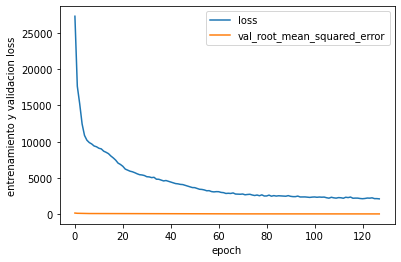

In [219]:
import matplotlib.pyplot as plt
plt.plot(epoch_historial.history['loss'])
plt.plot(epoch_historial.history['root_mean_squared_error'])
# plt.plot(epoch_historial.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('entrenamiento y validacion loss')
plt.legend(['loss','val_root_mean_squared_error','val_loss'])   

In [220]:
y_train_pred = model.predict(X_test)
#predigo con los datos de test (y las dichas columnas que seleccione antes segun su correlacion)
#y le hago un inverse transform asi tengo los datos en el formato que estaban

75/75 [==============================] - 0s 2ms/step


In [221]:
RMSE = mean_squared_error(y_train_pred, y_test, squared=False)
RMSE

#rmse de prueba con el train test split

47.59435253197486

In [224]:
model_entrega = tf.keras.Sequential()
model_entrega.add(tf.keras.layers.Dense(units=50 ,activation='relu',input_shape=(9, )))
model_entrega.add(tf.keras.layers.Dense(units=50 ,activation='relu'))
model_entrega.add(tf.keras.layers.Dense(units=50 ,activation='relu'))
model_entrega.add(tf.keras.layers.Dense(units=50 ,activation='relu'))
model_entrega.add(tf.keras.layers.Dense(units=1 ,activation='linear'))
model_entrega.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_236 (Dense)           (None, 50)                500       
                                                                 
 dense_237 (Dense)           (None, 50)                2550      
                                                                 
 dense_238 (Dense)           (None, 50)                2550      
                                                                 
 dense_239 (Dense)           (None, 50)                2550      
                                                                 
 dense_240 (Dense)           (None, 1)                 51        
                                                                 
Total params: 8,201
Trainable params: 8,201
Non-trainable params: 0
_________________________________________________________________


In [225]:
metrics = tf.keras.metrics.RootMeanSquaredError()
model_entrega.compile(optimizer = "Adam", loss = 'mean_squared_error', metrics = metrics)

epoch_historial_entrega = model_entrega.fit(X,y,epochs= 128,batch_size= 64, shuffle=True,workers=6)

Epoch 1/128
188/188 [==============================] - 1s 2ms/step - loss: 24670.7539 - root_mean_squared_error: 157.0693
Epoch 2/128
188/188 [==============================] - 0s 2ms/step - loss: 16168.4795 - root_mean_squared_error: 127.1553
Epoch 3/128
188/188 [==============================] - 0s 1ms/step - loss: 12579.0352 - root_mean_squared_error: 112.1563
Epoch 4/128
188/188 [==============================] - 0s 2ms/step - loss: 10708.0713 - root_mean_squared_error: 103.4798
Epoch 5/128
188/188 [==============================] - 0s 2ms/step - loss: 10064.6074 - root_mean_squared_error: 100.3225
Epoch 6/128
188/188 [==============================] - 0s 2ms/step - loss: 9785.1699 - root_mean_squared_error: 98.9200
Epoch 7/128
188/188 [==============================] - 0s 2ms/step - loss: 9651.1299 - root_mean_squared_error: 98.2402
Epoch 8/128
188/188 [==============================] - 0s 1ms/step - loss: 9306.4961 - root_mean_squared_error: 96.4702
Epoch 9/128
188/188 [=========

In [229]:
df_test.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [230]:
X_datos_test = df_test.drop(['instant','dteday','mnth','holiday','weathersit'],axis=1)
y_datos_pred = model.predict(X_datos_test)

169/169 [==============================] - 0s 1ms/step


In [231]:
dataframe = pd.DataFrame(y_datos_pred)
dataframe2 = dataframe.rename(columns={0:'pred'})
dataframe2['pred']=dataframe2['pred'].astype('int64')
dataframe2.to_csv('luqui5.csv',index=False)
#paso a dataframe y guardo a csv los datos para la entregaa